$$K_n(z)=(-1)^{n+1}I_n(z)\ln\left(\frac{z}{2}\right)+\frac{1}{2}\sum_{m=0}^{n-1} (-1)^m \left(\frac{z}{2}\right)^{2m-n}\frac{(n-m-1)!}{m!}+\frac{(-1)^n}{2}\sum_{m=0}^{\infty}\left(\frac{z}{2}\right)^{n+2m}\frac{\psi(n+m+1)+\psi(m+1)}{m!(n+m)!}$$
$$I_n=\sum_{m=0}^{\infty}\frac{\left(\frac{z}{2}\right)^{2m+n}}{m!\Gamma(m+n+1)}$$
$$\psi(z)=\frac{\Gamma'(z)}{\Gamma(z)}$$
$$\psi(n+1)=1+\frac12+\frac13+...+\frac1n-\gamma \qquad \gamma=0.5772156649$$
$$\psi(z+1)=\psi(z)+\frac1z$$
$$K_n(z)=\sqrt{\frac{\pi}{2z}}e^{-z}\left[\sum_{m=0}^{M-1}\frac{\Gamma\left(n+\frac12+m\right)}{m!\Gamma\left(n+\frac12-m\right)}(2z)^{-m}+O(z^{-M})\right]=\sqrt{\frac{\pi}{2z}}e^{-z}\left[\sum_{m=0}^{M-1}(n,m)(2z)^{-m}+O(z^{-M})\right]$$
$$(n,m)=\frac{2^{-2m}}{m!}\left[4n^2-1\right]...\left[4n^2-(2m-1)^2\right]$$

$$K_1(z)=I_1(z)\ln\left(\frac{z}{2}\right)+\frac{1}{z}-\frac{1}{2}\sum_{m=0}^{\infty}\left(\frac{z}{2}\right)^{1+2m}\frac{\psi(m+2)+\psi(m+1)}{(m!)^2(m+1)}$$
$$I_1(z)=\sum_{m=0}^{\infty}\frac{\left(\frac{z}{2}\right)^{1+2m}}{(m!)^2(m+1)}$$
$$K_1(z)=\frac{1}{z}+\sum_{m=0}^{\infty}\frac{\left(\frac{z}{2}\right)^{1+2m}}{(m!)^2(m+1)}\left[\ln\left(\frac{z}{2}\right)-\frac{1}{2(m+1)}-\psi(m+1)\right]$$

In [16]:
import numpy as np
from scipy.special import kn

C=0.5772156649
def my_K1_small(z,M=1000):
    a=z/2
    b=0
    psi=-C
    k=1/z
    for m in range(M):
        b=(np.log(z/2)-1/(2*m+2)-psi)/(m+1)
        k+=a*b
        
        psi+=1/(m+1)
        a*=(z/2) ** 2
        a*=1/(m+1) ** 2
    return k   
def my_K1_big(z,M=1000):
    b = 1
    k=0
    for m in range(M):
        k += b * (2*z) ** (-m)
        b *= (1-(2*m+1)/4)/(m+1)
    k*=(np.pi/(2*z))**0.5 * np.exp(-z)    
    return k 

def my_K1(z,M=10,z0=10.5):
    if z<=z0:
        return my_K1_small(z,M)
    else:
        return my_K1_big(z,M)

print(my_K1_small(2)-kn(1, 2)) 

-2.4382718066817688e-12


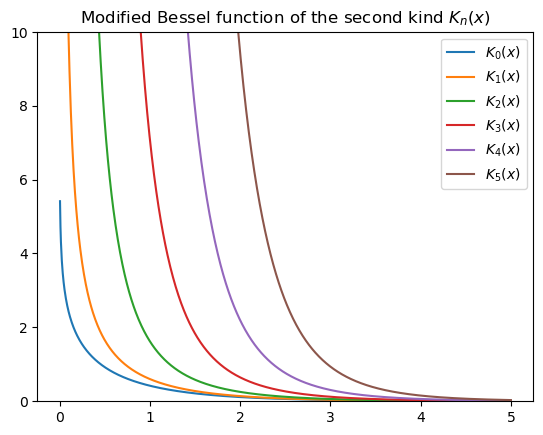

In [17]:
import numpy as np
from scipy.special import kn
import matplotlib.pyplot as plt
x = np.linspace(0, 5, 1000)
for N in range(6):
    plt.plot(x, kn(N, x), label='$K_{}(x)$'.format(N))
plt.ylim(0, 10)
plt.legend()
plt.title(r'Modified Bessel function of the second kind $K_n(x)$')
plt.show()

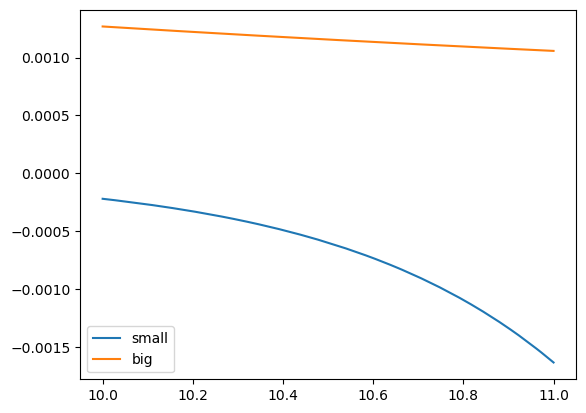

In [21]:
x = np.linspace(10,11, 1000)

plt.plot(x, (my_K1_small(x)-kn(1,x))/kn(1,x))
plt.plot(x, (my_K1_big(x)-kn(1,x))/kn(1,x))
plt.legend(["small","big"])
plt.show()

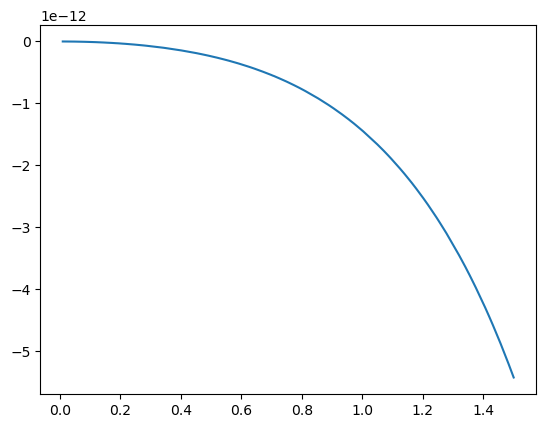

In [20]:
y=[(my_K1(x[i])-kn(1,x[i]))/kn(1,x[i]) for i in range(len(x))]
plt.plot(x, y)
plt.show()

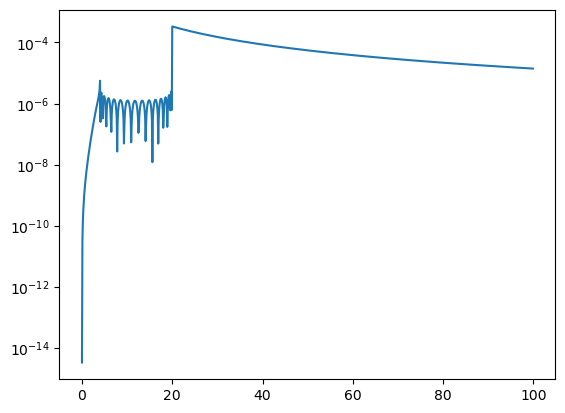

In [6]:
from bessel import my_Q1
from scipy.special import k1e
import numpy as np
import torch
import matplotlib.pyplot as plt

x = torch.tensor(np.arange(0.001,100,0.1))
my = my_Q1(x)
sci = k1e(x)
delta = torch.abs((my-sci)/sci)
plt.figure()
plt.plot(x,delta)
plt.yscale("log")
plt.show()

In [2]:
x = np.arange(4,20,0.0001)
x1 = np.arange(4,20,0.0001)
y = k1e(x)
z = np.polyfit(x, y, 20)
def f(x):
    L = 1
    s = 0
    c = z[::-1]
    for i in range(len(z)):
        s+=L*c[i]
        L*=x
    return s
plt.figure()
plt.plot(x1,abs(f(x1)-k1e(x1))<10**-6)
plt.show()
np.savetxt("coeff_bessel.txt",z)

NameError: name 'k1e' is not defined

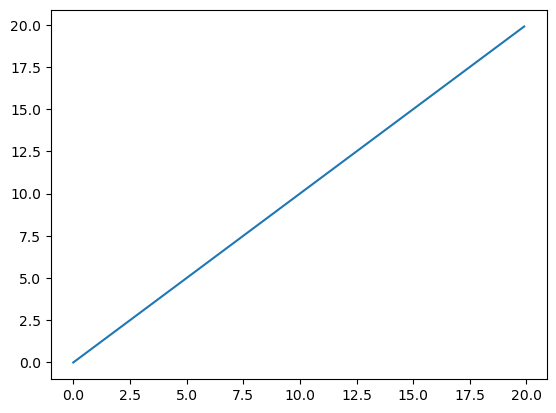

In [1]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0,20,0.1)
plt.figure()
plt.plot(x,x)
plt.show()